<a href="https://colab.research.google.com/github/shourjya19b/Financial-Fraud-Detection/blob/main/Financial_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [ ]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest

In [ ]:
!pip install H2O

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for H2O: filename=h2o-3.40.0.2-py2.py3-none-any.whl size=177693439 sha256=3e12c869600bd99c92f4f99021528e3ded1a1f76833f94a4682d2d0c14b37636
  Stored in directory: /root/.cache/pip/wheels/b2/79/e3/842b81607eb31946ee24898cc9961b101e6486f988a5103967
Successfully built H2O


In [ ]:
import h2o
from h2o.estimators import H2OExtendedIsolationForestEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpku4_4uja
  JVM stdout: /tmp/tmpku4_4uja/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpku4_4uja/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_696duj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
data=pd.read_excel('/content/Dataset_Datathon_Fraud_Detection_Transformed.xlsx')

In [ ]:
data.head()

,customer_id,event_dttm_Deli,event_type_nm,client_defined_event_type_nm,event_desc,operaton_amt_100 (rupees),active phone call,remote desktop protokol,emulator,f,...,os,device_model,screensize,agentconnectiontype,screen_hash,device for user,reciever,password change,fast change of ip,ip not equal to previous
0,customer_id_0,2022-10-01 10:51:36,CHANGE_PASSWORD,RENEW,Login password recovery,0.0,2,2,2,St Petersburg,...,NaN,NaN,NaN,NaN,287067538,1,0,0,0,1
1,customer_id_0,2022-10-01 11:15:21,SESSION_SIGNIN,SESSION_SIGNIN,Login,0.0,2,2,2,St Petersburg,...,NaN,NaN,NaN,NaN,287067538,1,0,1,0,1
2,customer_id_0,2022-10-01 11:31:55,SESSION_SIGNIN,SESSION_SIGNIN,Login,0.0,2,2,2,St Petersburg,...,NaN,NaN,NaN,NaN,-205759950,1,0,1,0,1
3,customer_id_0,2022-10-01 11:45:42,SESSION_SIGNIN,SESSION_SIGNIN,Login,0.0,2,2,2,St Petersburg,...,NaN,NaN,NaN,NaN,287067538,1,0,1,0,1
4,customer_id_0,2022-10-03 10:28:24,DEPOSIT,100_BKO,Payment order,116820.0,1,0,2,NaN,...,iOS,iPhone,375x812,wifi,0,2,0,0,0,0


In [ ]:
data.isnull().sum()

customer_id                         0
event_dttm_Deli                     0
event_type_nm                       0
client_defined_event_type_nm     1415
event_desc                        169
operaton_amt_100 (rupees)           0
active phone call                   0
remote desktop protokol             0
emulator                            0
f                                6303
device_id                        7183
os                               7183
device_model                     7183
screensize                       7183
agentconnectiontype             10106
screen_hash                         0
device for user                     0
reciever                            0
password change                     0
fast change of ip                   0
ip not equal to previous            0
dtype: int64

In [ ]:
data.replace(np.NaN,'NA',inplace=True)

In [ ]:
data.isnull().sum()

customer_id                     0
event_dttm_Deli                 0
event_type_nm                   0
client_defined_event_type_nm    0
event_desc                      0
operaton_amt_100 (rupees)       0
active phone call               0
remote desktop protokol         0
emulator                        0
f                               0
device_id                       0
os                              0
device_model                    0
screensize                      0
agentconnectiontype             0
screen_hash                     0
device for user                 0
reciever                        0
password change                 0
fast change of ip               0
ip not equal to previous        0
dtype: int64

In [ ]:
data['Time']=((data['event_dttm_Deli'].dt.hour)+(data['event_dttm_Deli'].dt.minute/60))/24

In [ ]:
data.drop(['customer_id','event_desc','event_dttm_Deli'],axis=1,inplace=True)

In [ ]:
data.columns

Index(['event_type_nm', 'client_defined_event_type_nm',
       'operaton_amt_100 (rupees)', 'active phone call',
       'remote desktop protokol', 'emulator', 'f', 'device_id', 'os',
       'device_model', 'screensize', 'agentconnectiontype', 'screen_hash',
       'device for user', 'reciever', 'password change', 'fast change of ip',
       'ip not equal to previous', 'Time'],
      dtype='object')

In [ ]:
column_tf=ColumnTransformer([('minmax',MinMaxScaler(),[2,18]),('ohe',OneHotEncoder(),[0,1,3,4,5,6,7,8,9,10,11,12,13])],remainder='passthrough')

X=column_tf.fit_transform(data)

In [ ]:
X.shape

(10969, 760)

In [ ]:
iso_forest=IsolationForest(contamination=0.02,random_state=42)

In [ ]:
results=iso_forest.fit_predict(X)
data['anomaly_if']=pd.Series(results)

scores=iso_forest.score_samples(X)
data['anomaly_score_if']=pd.Series(scores)

In [ ]:
cutoff_if=data[data['anomaly_if']==-1]['anomaly_score_if'].max()
print(cutoff_if)

-0.36798524733170057


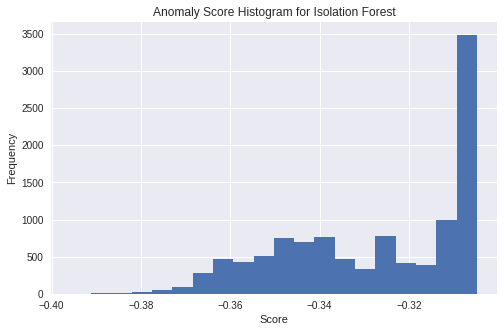

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(scores,bins=20)
plt.title('Anomaly Score Histogram for Isolation Forest')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Define an Extended Isolation forest model
eif = H2OExtendedIsolationForestEstimator(model_id = "eif.hex",
                                          ntrees = 100,
                                          sample_size = 256,
                                          extension_level = X.shape[1]-1)

# Converting Numpy array to H2O Frame
h2o_df=h2o.H2OFrame(X)

# Train Extended Isolation Forest
eif.train(training_frame = h2o_df)

# Calculate score
eif_result = eif.predict(h2o_df)

# Number in [0, 1] explicitly defined in Equation (1) from Extended Isolation Forest paper
# or in paragraph '2 Isolation and Isolation Trees' of Isolation Forest paper
anomaly_score = eif_result["anomaly_score"]

# Average path length  of the point in Isolation Trees from root to the leaf
mean_length = eif_result["mean_length"]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest Model Build progress: |██████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%


In [ ]:
results_eif=eif_result.as_data_frame()

In [ ]:
anomaly_score_eif=results_eif['anomaly_score'].to_numpy()

cutoff_eif=np.percentile(anomaly_score_eif,98)

print(cutoff_eif)

0.43398428274904005


In [ ]:
anomaly_eif=pd.Series([-1 if a>=cutoff_eif else 1 for a in anomaly_score_eif])

data['anomaly_eif']=anomaly_eif

In [ ]:
data=pd.concat([data,results_eif],axis=1)

In [ ]:
data.rename(columns={'anomaly_score':'anomaly_score_eif'},inplace=True)

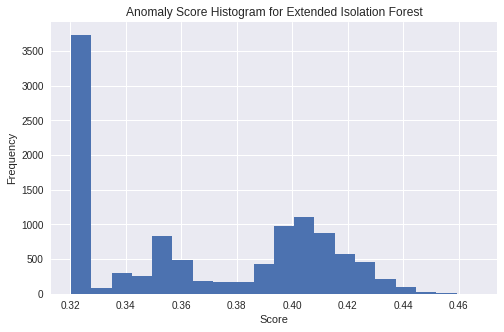

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(anomaly_score_eif,bins=20)
plt.title('Anomaly Score Histogram for Extended Isolation Forest')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
data[(data['anomaly_if']==-1) | (data['anomaly_eif']==-1)]

,event_type_nm,client_defined_event_type_nm,operaton_amt_100 (rupees),active phone call,remote desktop protokol,emulator,f,device_id,os,device_model,...,reciever,password change,fast change of ip,ip not equal to previous,Time,anomaly_if,anomaly_score_if,anomaly_eif,anomaly_score_eif,mean_length
4,DEPOSIT,100_BKO,116820.0,1,0,2,NA,device_id_1,iOS,iPhone,...,0,0,0,0,0.436111,-1,-0.378086,1,0.427940,12.544930
15,DEPOSIT,100_BKO,472000.0,0,0,2,NA,device_id_1,iOS,iPhone,...,0,0,0,0,0.602083,-1,-0.368784,1,0.415237,12.990282
30,DEPOSIT,100_BKO,472000.0,0,0,2,NA,device_id_1,iOS,iPhone,...,0,0,0,0,0.604167,-1,-0.368784,1,0.415237,12.990282
31,DEPOSIT,100_BKO,472000.0,0,0,2,NA,device_id_1,iOS,iPhone,...,0,0,0,0,0.605556,-1,-0.368784,1,0.415237,12.990282
34,DEPOSIT,100_BKO,472000.0,0,0,2,NA,device_id_1,iOS,iPhone,...,0,0,0,0,0.627083,-1,-0.368534,1,0.411583,13.120942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10888,CHANGE_PASSWORD,MOB_APP_CHANGE_PASSWORD,0.0,0,0,2,Surat,device_id_204,iOS,iPhone,...,0,0,0,0,0.395833,1,-0.364614,-1,0.441715,12.076673
10892,CARD_PIN_CHANGE,REMOTE_PIN,0.0,0,0,2,NA,device_id_209,iOS,iPhone,...,0,0,0,0,0.453472,1,-0.364234,-1,0.435659,12.280699
10893,PAYMENT,WithoutRisk,82.6,0,0,2,NA,device_id_209,iOS,iPhone,...,1,1,0,1,0.459028,1,-0.365909,-1,0.434902,12.306393
10958,SESSION_SIGNIN,MOB_APP_SESSION_SIGNIN,0.0,0,0,2,Kalkutta,device_id_211,iOS,iPhone,...,0,0,0,1,0.472222,1,-0.348329,-1,0.434270,12.327897
